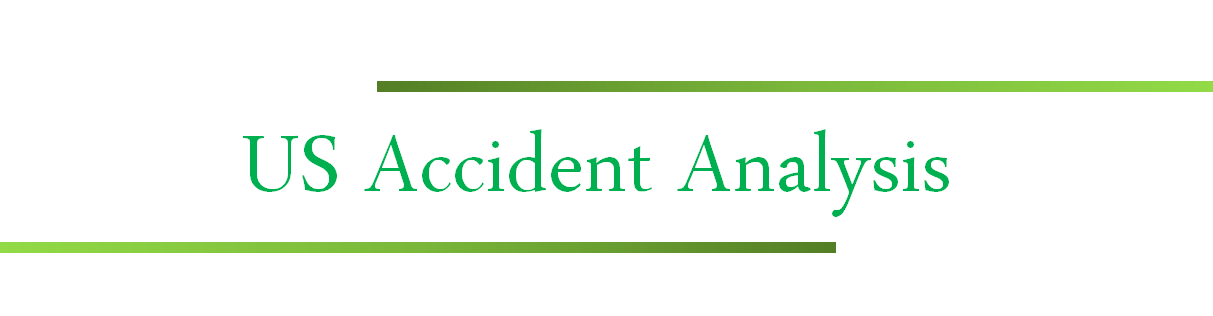

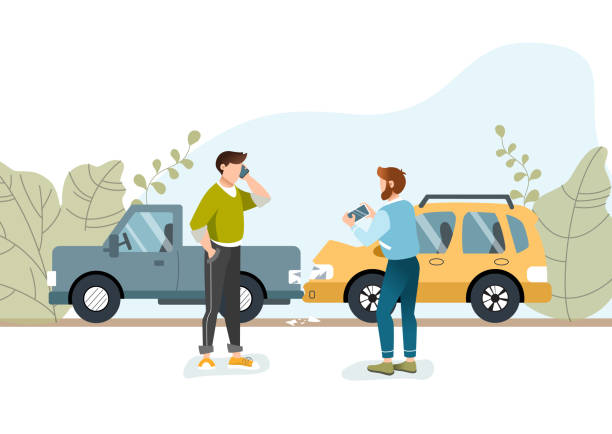

<p style="font-size:20px; font-style:italic;">
This is a countrywide car accident dataset, which covers <span style="color:green;">49 states</span> of the USA. The accident data are collected from <span style="color:green;">February 2016 to December 2020</span>, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the <span style="color:green;">US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors</span> within the road-networks. Currently, there are about <span style="color:green;">1.5 million accident records</span> in this dataset. Check here to learn more about this dataset.
</p>

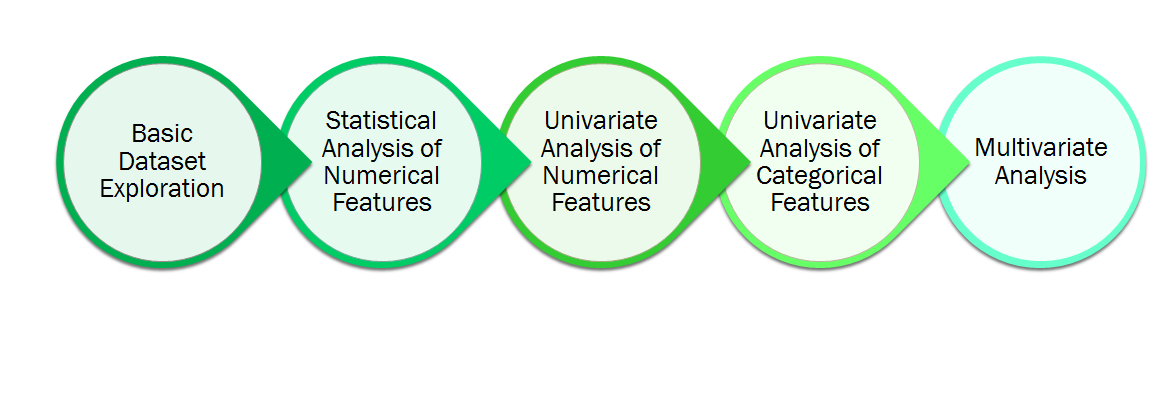

<li style="font-family:'Times New Roman';font-weight: bold;font-size:40px;color:  #30850c">Basic Data Exploration</li>

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar

In [3]:
df = pd.read_csv('../input/us-accidents/US_Accidents_Dec20_updated.csv')

In [4]:
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

In [5]:
# Basic information of the Dataset
df.info()

In [6]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

In [7]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

In [8]:
numerical_df = df[numerical_features]

<li style="font-family:'Times New Roman';font-weight: bold;font-size:40px;color:  #30850c">Statistical Analysis</li>

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='RdYlBu');

<li style="font-family:'Times New Roman';font-weight: bold;font-size:30px;color:  #30850c">City Analysis</li>

In [10]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Count'})

In [11]:
city_df.shape

## Top 10 Cities with most no. of accidents

In [12]:
top_10_cities = pd.DataFrame(city_df.head(10).sample(frac = 1))

In [13]:
top_10_cities

In [14]:
fig, ax = plt.subplots(figsize = (15,7), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

clrs = ['#3bc484' if (x < max(city_df['Count'])) else 'grey' for x in top_10_cities['Count']]
ax=sns.barplot(y=top_10_cities['Count'], x=top_10_cities['City'], palette=clrs)

total = sum(city_df['Count'])
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='white')

plt.title('Top 10 Cities in US with most no. of Accidents \n', size=20)

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Myanmar Text']

ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)

<p style="font-size:20px; font-style:italic;">
1. <span style="color:green;">Los Angeles</span> is the city with <span style="color:green;">highest</span> no. of road accidents in US from 2016 to 2020.
</p>

<p style="font-size:20px; font-style:italic;">
2. <span style="color:green;">Miami</span> is the city with <span style="color:green;">2nd highest</span> no. of road accidents in US from 2016 to 2020.
</p>

In [15]:
def city_percentage(val, operator):
    if operator == '<':
        res = city_df[city_df['Count']<val].shape[0]
        print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')
    elif operator == '>':
        res = city_df[city_df['Count']>val].shape[0]
        print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')
    elif operator == '=':
        res = city_df[city_df['Count']==val].shape[0]
        print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')

In [16]:
city_percentage(1, '=')
city_percentage(100, '<')
city_percentage(1000, '<')
city_percentage(1000, '>')
city_percentage(5000, '>')
city_percentage(10000, '>')

<p style="font-size:20px; font-style:italic;">
3. <span style="color:green;">11% (1167 Cities)</span> of the total no. of cities in US where the total no. of road accidents in 2016-2020 is <span style="color:green;">only 1</span>.
</p> 

<p style="font-size:20px; font-style:italic;">
4. <span style="color:green;">81.47% (8,682 Cities)</span> of the total no. of cities in US where the total no. of road accidents in 2016-2020 is <span style="color:green;">less than 100</span>.
</p>

<p style="font-size:20px; font-style:italic;">
5. <span style="color:green;">97.64% (10,406 Cities)</span> of the total no. of cities in US where the total no. of road accidents in 2016-2020 is <span style="color:green;">less than 1,000</span>.
</p>

<p style="font-size:20px; font-style:italic;">
6. <span style="color:green;">2.36% (251 Cities)</span> of the total no. of cities in US where the total no. of road accidents in 2016-2020 is <span style="color:green;">more than 1,000</span>.
</p>

<p style="font-size:20px; font-style:italic;">
7. <span style="color:green;">0.38% (40 Cities)</span> of the total no. of cities in US where the total no. of road accidents in 2016-2020 is <span style="color:green;">more than 5,000</span>.
</p>

<p style="font-size:20px; font-style:italic;">
8. <span style="color:green;">0.12% (13 Cities)</span> of the total no. of cities in US where the total no. of road accidents in 2016-2020 is <span style="color:green;">more than 10,000</span>.
</p>

<li style="font-family:'Times New Roman';font-weight: bold;font-size:30px;color:  #30850c">Severity Analysis</li>

<p style="font-size:20px;">
It Shows the severity of the accident, a number between 1 and 4, where <span style="color:green;">1</span> indicates the <span style="color:green;">least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)</span>. Note that severity reported by different sources may differ in their underlying impact on traffic, so please separate data from different sources when doing severity-based analysis.
</p>

In [34]:
severity_df = pd.DataFrame(df['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity', 'Severity':'Count'})

In [35]:
severity_df

In [36]:
severity_df = severity_df.sample(frac = 1)

In [37]:
severity_df

In [38]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

clrs = ['#3bc484' if (x < max(severity_df['Count'])) else 'grey' for x in severity_df['Count']]
ax=sns.barplot(x=severity_df['Severity'], y=severity_df['Count'], palette=clrs)

total = sum(severity_df['Count'])
for i in ax.patches:
    ax.text(i.get_x()+.25, i.get_height()+5000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

plt.title('Impact on the Traffic due to the Accidents \n', size=20)
plt.ylim((pow(10,3), pow(10,7)))
plt.ylabel('Accidents Counts (Log-Scale)', fontsize=13)
plt.xlabel('Severity Status', fontsize=13)

ax.set_yscale('log')
ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)

<p style="font-size:20px; font-style:italic;">
9. In <span style="color:green;">80% Cases</span> of road accidents, the impact on the traffic was <span style="color:green;">Modarate</span>.
</p>

<p style="font-size:20px; font-style:italic;">
10. In <span style="color:green;">7.5% Cases</span> of road accidents, the impact on the traffic was <span style="color:green;">Severe</span>.
</p>

In [22]:
df[df['City']=='Los Angeles']['Severity'].value_counts()

<li style="font-family:'Times New Roman';font-weight: bold;font-size:30px;color:  #30850c">Start_Time & End_Time</li>

<p style="font-size:20px;">
<span style="color:green;">Start_Time</span> shows start time of the accident in <span style="color:green;">local time zone</span>.
End_Time shows end time of the accident in local time zone. <span style="color:green;">End time</span> here refers to when the impact of accident on <span style="color:green;">traffic flow</span>.
</p>

In [23]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

<li style="font-family:'Times New Roman';font-weight: bold;font-size:25px;color:  #30850c"> Accident Duration Analysis</li>

<p style="font-size:20px;">
Here we are analyzing the <span style="color:green;">total duration</span> of the Impact created on the traffic flow due to the accident by calculating the <span style="color:green;">difference between Start_Time and End_Time</span> on local time zone.
</p>

In [43]:
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [70]:
top_10_accident_duration = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Count'})
Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration.Duration]
top_10_accident_duration['Duration'] = Duration

In [71]:
top_10_accident_duration

In [81]:
fig, ax = plt.subplots(figsize = (15,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

clrs = ['#3bc484' if (x < max(top_10_accident_duration['Count'])) else 'grey' for x in top_10_accident_duration['Count']]
ax=sns.barplot(y=top_10_accident_duration['Count'], x=top_10_accident_duration['Duration'], palette=clrs)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+5000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

plt.ylim(1000, 400000)
plt.title('Most Impacted Durations on the Traffic flow due to the Accidents \n', size=20)
plt.ylabel('Accidents Counts', fontsize=13)
plt.xlabel('Duration of Accident (HH:MM:SS)', fontsize=13)


ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)

<p style="font-size:20px; font-style:italic;">
11. From the above plot it is inferred that <span style="color:green;">majority (24.25%)</span> of road accidents, have impacted on the traffic flow for <span style="color:green;">6 hours</span>.
</p>

<li style="font-family:'Times New Roman';font-weight: bold;font-size:25px;color:  #30850c"> Start_Time Analysis</li>

In [142]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Count'}).sort_values('Hours')

In [143]:
fig, ax = plt.subplots(figsize = (15,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

clrs = []
for x in hour_df['Count']:
    if int(hour_df[hour_df['Count']==x]['Hours']) <= 11:
        if (x == max(list(hour_df['Count'])[:12])):
            clrs.append('grey')
        else:
            clrs.append('#10eb85')
    else:
        if (x == max(list(hour_df['Count'])[12:])):
            clrs.append('grey')
        else:
            clrs.append('#3bc484')
ax=sns.barplot(y=hour_df['Count'], x=hour_df['Hours'], palette=clrs)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 150000)
plt.title('Accident Percentage for different hours along the day\n', size=20)
plt.ylabel('Accidents Counts', fontsize=13)
plt.xlabel('Hour of the Day', fontsize=13)


ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)

<p style="font-size:20px; font-style:italic;">
12. <span style="color:green;">Around 18%</span> of the road accidents occurs in between <span style="color:green;">6:00AM to 9:00AM</span> in Day-time.
</p>

<p style="font-size:20px; font-style:italic;">
13. In evening, <span style="color:green;">around 27%</span> of the road accidents occurs in between <span style="color:green;">3:00PM to 6:00PM</span>.
</p>

<p style="font-size:20px; font-style:italic;">
14. The <span style="color:green;">most-deadlist accident hour</span> is <span style="color:green;">5:00PM</span> implies the <span style="color:green;">Evening Office-Returning Hours</span>.
</p>

<p style="font-size:20px; font-style:italic;">
15. The <span style="color:green;">2nd most-deadlist accident hour</span> is <span style="color:green;">8:00AM</span> implies the <span style="color:green;">Morning Office-Going Hours</span>.
</p>

In [144]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Count'}).sort_values('Month')

In [170]:
months = list(calendar.month_name)[1:]
month_df.Month = months

In [192]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

clrs = []
for x in month_df['Count']:
    if (x == max(month_df['Count'])):
        clrs.append('grey')
    elif (x == min(month_df['Count'])):
        clrs.append('#98b8a9')
    else:
        clrs.append('#3bc484')
ax=sns.barplot(x=month_df['Count'], y=month_df['Month'], palette=clrs)

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()-15000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=15, color='white')

plt.title('Accident Percentage for different Months along the Year\n', size=20)
plt.xlabel('Accidents Counts', fontsize=13)
plt.ylabel('Month of the Year', fontsize=13)

ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)

<p style="font-size:20px; font-style:italic;">
16. <span style="color:green;">Around 18%</span> of the road accidents occurs in the month of <span style="color:green;">December</span>.
</p>

<p style="font-size:20px; font-style:italic;">
17. <span style="color:green;">July</span> is month with <span style="color:green;">least (3.54%)</span> no. of road accidents in US.
</p>

<p style="font-size:20px; font-style:italic;">
18. <span style="color:green;">45 %</span> of the road accidents occurs only within the <span style="color:green;">3 months, October to December</span> <span style="color:green;">(i.e. transition period from Autumn to Winter)</span>.
</p>

In [208]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Count'})

In [234]:
fig, ax = plt.subplots(figsize = (15,6), dpi = 80)
ax.set_facecolor('#e6f2ed')
fig.patch.set_facecolor('#e6f2ed')

clrs = []
for x in day_df['Day']:
    if x in ['Saturday', 'Sunday']:
        clrs.append('#10eb85')
    else:
        if x == list(day_df[day_df['Count'] == max(day_df['Count'])]['Day'])[0]:
            clrs.append('grey')
        else:
            clrs.append('#3bc484')
ax=sns.barplot(y=day_df['Count'], x=day_df['Day'], palette=clrs)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='white')

plt.ylim(50000, 300000)
plt.title('Accident Percentage for different Days along the Week\n', size=20)
plt.ylabel('Accidents Counts', fontsize=13)
plt.xlabel('Day of the Week', fontsize=13)


ax.set_axisbelow(True)
ax.grid(color='white', linewidth=1.5)

<p style="font-size:20px; font-style:italic;">
19. <span style="color:green;">Working Days</span> of the week have almost <span style="color:green;">2 times higher</span> rate of percentage compared with the <span style="color:green;">Weekend Days</span> which is as our expectation.
</p>

<p style="font-size:20px; font-style:italic;">
20. In <span style="color:green;">Weekend, only around 17%</span> of the road accidents took place in US.
</p>

<p style="font-size:20px; font-style:italic;">
21. <span style="color:green;">Thursday</span> of a week is having the <span style="color:green;">highest</span> rate of percentage of road accidents.
</p>

<p style="font-size:20px; font-style:italic;">
22. On <span style="color:green;">Sunday</span> the rate of percentage of road accidents in US is <span style="color:green;">lowest</span>.
</p>